## 데이터 프레임 다루기

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fpath = "./dataset"

### df.sort_index(ascending=False)

In [5]:
# 딕셔서리를 정의
dict_data = {
    "c0":np.arange(1, 4),
    "c1":np.arange(4, 7),
    "c2":np.arange(7, 10),
    "c3":np.arange(10, 13),
    "c4":np.arange(13, 16),
}

# 딕셔서리를 데이터프레임으로 변환. 인덱스를 [r0, r1, r2]로 지정
df = pd.DataFrame(dict_data, index = ["r0", "r1", "r2"])
print(df)

    c0  c1  c2  c3  c4
r0   1   4   7  10  13
r1   2   5   8  11  14
r2   3   6   9  12  15


In [6]:
## index 정렬
df.sort_index(ascending= False, inplace = True)
print("df = \n", df)
print('-'*50)

# value
# 내림차순으로 행 인덱스 정렬
df.sort_values(by = 'c0', ascending = True, inplace = True)
print('df = = \n', df)
print('-'*50)
df.sort_values(by = ['c0', 'c1'], ascending = True, inplace = True)
print('df = = \n', df)

df = 
     c0  c1  c2  c3  c4
r2   3   6   9  12  15
r1   2   5   8  11  14
r0   1   4   7  10  13
--------------------------------------------------
df = = 
     c0  c1  c2  c3  c4
r0   1   4   7  10  13
r1   2   5   8  11  14
r2   3   6   9  12  15
--------------------------------------------------
df = = 
     c0  c1  c2  c3  c4
r0   1   4   7  10  13
r1   2   5   8  11  14
r2   3   6   9  12  15


### Broad casting

In [7]:
## Broadcasting
titanic = sns.load_dataset('titanic')
print(titanic.head())
won = titanic['fare']*1300
print('-'*50)
titanic.insert(7, "won", won)
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
--------------------------------------------------
   survived  pclass     sex   age  sibsp  parch     fare       won embarked  \
0         0       3    male  22.0      1      0   7.2500   9425.00        S   
1         

### 데이터프레임 연산

In [9]:
titanic.head()

new_df = titanic.loc[:, 'fare':'won']
print(new_df.head())
print('-'*30)

add_df = new_df + 1000
print(add_df.head())
print('-'*30)

# 데이터프레임끼리 연산하기 (additon - df)
add_df - new_df

      fare       won
0   7.2500   9425.00
1  71.2833  92668.29
2   7.9250  10302.50
3  53.1000  69030.00
4   8.0500  10465.00
------------------------------
        fare       won
0  1007.2500  10425.00
1  1071.2833  93668.29
2  1007.9250  11302.50
3  1053.1000  70030.00
4  1008.0500  11465.00
------------------------------


,fare,won
0,1000.0,1000.0
1,1000.0,1000.0
2,1000.0,1000.0
3,1000.0,1000.0
4,1000.0,1000.0
...,...,...
886,1000.0,1000.0
887,1000.0,1000.0
888,1000.0,1000.0
889,1000.0,1000.0


In [13]:
import pandas as pd
fname = 'vor_r.xlsx'
file = os.path.join(fpath, fname)
vor = pd.read_excel(file)

print("vor = \n",vor.head())
print('-'*100)

mean_col = vor.loc[:, 'hz0.04':].mean(axis = 1)
mean_col

vor.insert(3, 'mean', mean_col)
# vor.head()
vor.sort_values(by = 'mean', ascending = False, inplace= True)
print(vor.iloc[:10, :4]) # 왜 iloc일까

vor_df10 = vor.iloc[:10, :4]

vor = 
    group  id time    hz0.04    hz0.08     hz0.1    hz0.16    hz0.32    hz0.64  \
0      1   1  Pre  0.213840  0.717955  0.848727  0.850790  0.802738  0.808393   
1      1   2  Pre  0.345725  0.795440  0.781473  0.924972  0.801245  0.803880   
2      1   3  Pre  0.376285  0.799327  0.781350  0.777773  0.868007  0.868853   
3      1   4  Pre  0.451440  0.771083  0.808645  0.787825  0.839985  0.832352   
4      1   5  Pre  0.287360  0.825547  0.831303  0.818332  0.817320  0.816153   

        hz1  
0  0.738967  
1  0.781420  
2  0.754252  
3  0.818722  
4  0.836298  
----------------------------------------------------------------------------------------------------
    group  id time      mean
13      2  14  Pre  0.807488
7       1   8  Pre  0.805965
6       1   7  Pre  0.798594
8       1   9  Pre  0.794495
12      2  13  Pre  0.780265
11      2  12  Pre  0.777636
5       1   6  Pre  0.775674
3       1   4  Pre  0.758579
14      2  15  Pre  0.758175
15      2  16  Pre  0.753647


In [14]:
# Filter
vor_df10 = vor.iloc[:10, :4]
vor_df10.iloc[5:, 2] = 'Post'
vor_df10

,group,id,time,mean
13,2,14,Pre,0.807488
7,1,8,Pre,0.805965
6,1,7,Pre,0.798594
8,1,9,Pre,0.794495
12,2,13,Pre,0.780265
11,2,12,Post,0.777636
5,1,6,Post,0.775674
3,1,4,Post,0.758579
14,2,15,Post,0.758175
15,2,16,Post,0.753647


In [17]:
idx1 = vor_df10.loc[:, 'time'] != 'Pre'
print(idx1)
print('-'*50)

idx2 = vor_df10.loc[:, 'mean'] > 0.77
print(idx2)

13    False
7     False
6     False
8     False
12    False
11     True
5      True
3      True
14     True
15     True
Name: time, dtype: bool
--------------------------------------------------
13     True
7      True
6      True
8      True
12     True
11     True
5      True
3     False
14    False
15    False
Name: mean, dtype: bool


In [18]:
print(vor_df10[(idx1) & (idx2) & (vor_df10.loc[:, 'group'] == 1)])

   group  id  time      mean
5      1   6  Post  0.775674


In [20]:
print(vor_df10[(idx1) | (idx2)])

    group  id  time      mean
13      2  14   Pre  0.807488
7       1   8   Pre  0.805965
6       1   7   Pre  0.798594
8       1   9   Pre  0.794495
12      2  13   Pre  0.780265
11      2  12  Post  0.777636
5       1   6  Post  0.775674
3       1   4  Post  0.758579
14      2  15  Post  0.758175
15      2  16  Post  0.753647


In [3]:
##
tips = sns.load_dataset('tips')
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


correlation coefficient (상관계수) = 

            total_bill       tip
total_bill    1.000000  0.675734
tip           0.675734  1.000000
----------------------------------------------------------------------------------------------------
Scatter plot


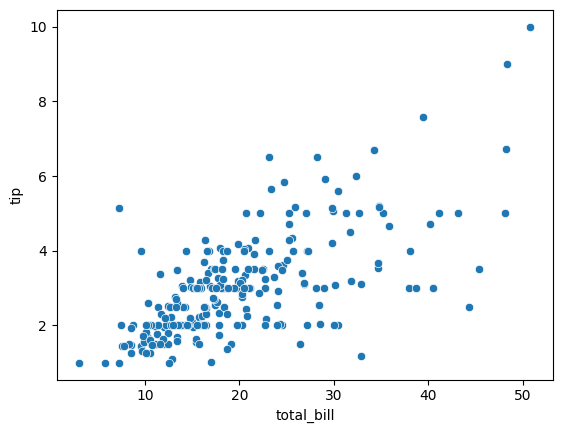

In [11]:
new_df = tips.loc[:, 'total_bill':'tip']
## correlation : 데이터의 상관성
#범위 : - 1 < r < 1 (r = 1 양의 상관, r = -1 음의 상관)

print("correlation coefficient (상관계수) = \n")
print(new_df[["total_bill","tip"]].corr())
print('-'*100)
print('Scatter plot')
sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.show()

In [48]:
##
mpg = sns.load_dataset('mpg')
kml = mpg['mpg']*0.425

mpg.insert(1, "kml", kml)
mpg = mpg.set_index('name')

mpg.loc[:, 'mpg':]

print("Current columns:", mpg.columns)

# Rename the columns
mpg.rename(columns={
    "cylinders": "cyl",
    "displacement": "disp",
    "horsepower": "hp"
}, inplace=True)
print(mpg)

Current columns: Index(['mpg', 'kml', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')
                            mpg     kml  cyl   disp     hp  weight  \
name                                                                 
chevrolet chevelle malibu  18.0   7.650    8  307.0  130.0    3504   
buick skylark 320          15.0   6.375    8  350.0  165.0    3693   
plymouth satellite         18.0   7.650    8  318.0  150.0    3436   
amc rebel sst              16.0   6.800    8  304.0  150.0    3433   
ford torino                17.0   7.225    8  302.0  140.0    3449   
...                         ...     ...  ...    ...    ...     ...   
ford mustang gl            27.0  11.475    4  140.0   86.0    2790   
vw pickup                  44.0  18.700    4   97.0   52.0    2130   
dodge rampage              32.0  13.600    4  135.0   84.0    2295   
ford ranger                28.0  11.900    4  120.0   79.0    2625   